__1. Подключение библиотек__

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

__2. Первичный анализ и загрузка данных__

In [32]:
print("=" * 80)
print("ЗАГРУЗКА И АНАЛИЗ ДАННЫХ")
print("=" * 80)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("\n==Тренировочные данные:==")
display(df_train.head())
print("\n==Тестовые данные:==")
display(df_test.head())

print(f"\n\nОбучающая выборка: {df_train.shape[0]} строк, {df_train.shape[1]} признаков")
print(f"Тестовая выборка:  {df_test.shape[0]} строк, {df_test.shape[1]} признаков\n\n")

print("\n==Информация о тренировочных данных:==")
display(df_train.info())
print("\n==Информация о тестовых данных:==")
display(df_test.info())

print("\n==Статистика тренировочных (числовых) данных:==")
display(df_train.describe())
print("\n==Статистика тестовых (числовых) данных:==")
display(df_test.describe())

print("\n==Статистика тренировочных (категориальных) данных:==")
display(df_train.describe(include='object'))
print("\n==Статистика тестовых (категориальных) данных:==")
display(df_test.describe(include='object'))

print("\n==Типы в тренировочных данных:==")
display(df_train.dtypes)
print("\n==Типы в тестовых данных==")
display(df_test.dtypes)

print("\n==Пропущенные значения в тренировочных данных:==")
display(df_train.isnull().sum())
print("\n==Пропущенные значения в тестовых данных:==")
display(df_test.isnull().sum())

print(f"\n\nКолонки с пропусками в train: {df_train.isnull().sum().sum()}")
print(f"Колонки с пропусками в test:  {df_test.isnull().sum().sum()}")


ЗАГРУЗКА И АНАЛИЗ ДАННЫХ

==Тренировочные данные:==


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091



==Тестовые данные:==


,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,0.883232,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,0.791928,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,0.805826,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,0.829294,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,0.735013,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707




Обучающая выборка: 11017 строк, 35 признаков
Тестовая выборка:  5000 строк, 35 признаков



==Информация о тренировочных данных:==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpen

None


==Информация о тестовых данных:==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13

None


==Статистика тренировочных (числовых) данных:==


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000e+07



==Статистика тестовых (числовых) данных:==


,ID,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,...,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,39.796800,133451.609800,678.525800,30502.155000,53.45760,1.530600,544.084000,0.284003,2.971600,...,6.557137e+04,11010.058167,0.784001,4.979000,17.532000,1.477317e+05,0.200787,0.200608,1103.247711,0.524048
std,1443.520003,11.682209,115320.189462,176.450819,29384.921842,24.48938,1.428381,499.481795,0.159059,1.745681,...,1.450428e+05,9389.355937,0.123768,2.222239,11.429764,3.965453e+05,0.095799,0.098288,1452.591314,0.946996
min,0.000000,18.000000,15000.000000,300.000000,1165.000000,12.00000,0.000000,21.000000,0.001717,0.000000,...,8.400000e+01,1250.000000,0.135743,0.000000,0.000000,1.003000e+03,0.052616,0.044439,29.895741,0.004656
25%,1249.750000,31.000000,21719.750000,553.000000,12834.000000,36.00000,0.000000,230.000000,0.158249,2.000000,...,8.083500e+03,1763.729167,0.707229,3.000000,9.000000,7.144000e+03,0.119306,0.118645,372.774514,0.063932
50%,2499.500000,40.000000,92029.500000,727.000000,22289.000000,48.00000,1.000000,400.500000,0.264909,3.000000,...,2.147900e+04,7636.291667,0.805489,5.000000,17.000000,2.650700e+04,0.180582,0.179172,696.143695,0.168760
75%,3749.250000,48.000000,261529.500000,850.000000,37418.500000,60.00000,2.000000,686.000000,0.384122,4.000000,...,6.005175e+04,21658.854167,0.878772,6.000000,25.000000,1.264388e+05,0.267143,0.267596,1315.406429,0.620982
max,4999.000000,80.000000,749283.000000,850.000000,395083.000000,120.00000,6.000000,6925.000000,0.927363,14.000000,...,2.581497e+06,25000.000000,0.993463,17.000000,60.000000,7.955539e+06,0.800083,0.949101,31256.225411,25.237780



==Статистика тренировочных (категориальных) данных:==


,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
count,10487,10487,10487,9986,10487,10487
unique,10000,4,4,5,3,5
top,1996-04-03,Married,Mortgage,Home,Employed,High School
freq,3,5145,4148,2981,9059,4234



==Статистика тестовых (категориальных) данных:==


,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
count,5000,5000,5000,5000,5000,5000
unique,5000,4,4,5,3,5
top,1979-01-03,Married,Mortgage,Home,Employed,High School
freq,1,2533,2020,1526,4304,2022



==Типы в тренировочных данных:==


ApplicationDate                object
Age                           float64
AnnualIncome                  float64
CreditScore                   float64
LoanAmount                    float64
LoanDuration                  float64
MaritalStatus                  object
NumberOfDependents            float64
HomeOwnershipStatus            object
MonthlyDebtPayments           float64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines       float64
NumberOfCreditInquiries       float64
DebtToIncomeRatio             float64
BankruptcyHistory             float64
LoanPurpose                    object
PreviousLoanDefaults          float64
PaymentHistory                float64
LengthOfCreditHistory         float64
SavingsAccountBalance         float64
CheckingAccountBalance        float64
TotalAssets                   float64
TotalLiabilities              float64
MonthlyIncome                 float64
UtilityBillsPaymentHistory    float64
JobTenure                     float64
EmploymentSt


==Типы в тестовых данных==


ID                              int64
ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBillsPaymentHistory    float64
JobTenure   


==Пропущенные значения в тренировочных данных:==


ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          


==Пропущенные значения в тестовых данных:==


ID                            0
ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInte



Колонки с пропусками в train: 23059
Колонки с пропусками в test:  0


__3. Анализ целевой переменной__


--- Анализ целевой переменной RiskScore ---
Среднее: -25698.7837
Медиана: 44.1188
Стандартное отклонение: 1431674.5904
Минимум: -9999999.0000
Максимум: 10000000.0000
Асимметрия: -0.8237
Эксцесс: 45.7695


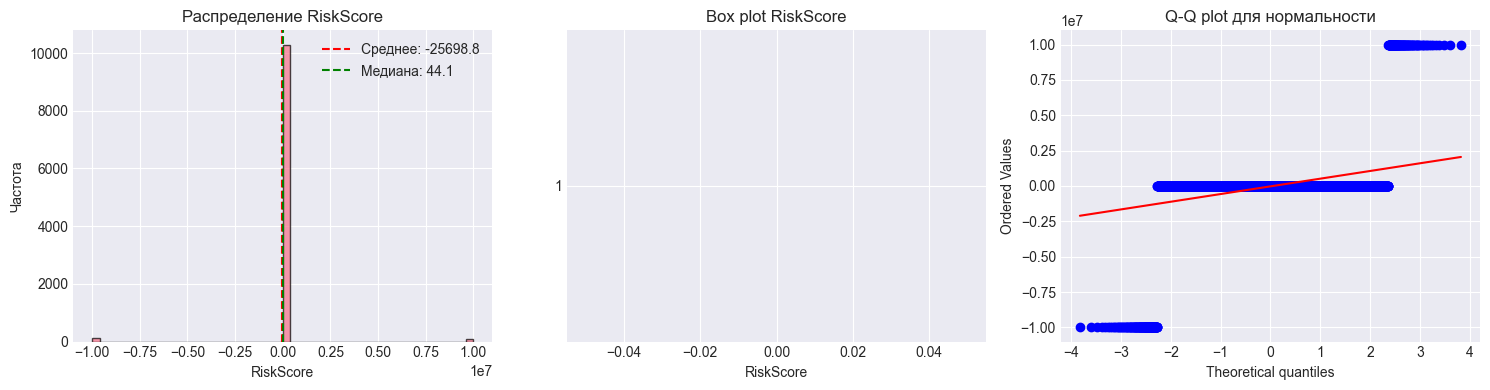

In [33]:
print("\n--- Анализ целевой переменной RiskScore ---")
target_stats = {
    'Среднее': df_train['RiskScore'].mean(),
    'Медиана': df_train['RiskScore'].median(),
    'Стандартное отклонение': df_train['RiskScore'].std(),
    'Минимум': df_train['RiskScore'].min(),
    'Максимум': df_train['RiskScore'].max(),
    'Асимметрия': df_train['RiskScore'].skew(),
    'Эксцесс': df_train['RiskScore'].kurtosis()
}

for stat, value in target_stats.items():
    print(f"{stat}: {value:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df_train['RiskScore'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('RiskScore')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение RiskScore')
axes[0].axvline(df_train['RiskScore'].mean(), color='red', linestyle='--', label=f'Среднее: {df_train["RiskScore"].mean():.1f}')
axes[0].axvline(df_train['RiskScore'].median(), color='green', linestyle='--', label=f'Медиана: {df_train["RiskScore"].median():.1f}')
axes[0].legend()

axes[1].boxplot(df_train['RiskScore'], vert=False)
axes[1].set_xlabel('RiskScore')
axes[1].set_title('Box plot RiskScore')

stats.probplot(df_train['RiskScore'].dropna(), dist="norm", plot=axes[2])
axes[2].set_title('Q-Q plot для нормальности')

plt.tight_layout()
plt.show()

__4. Матрица корреляций__


--- Анализ корреляций ---
Топ-15 признаков по абсолютной корреляции с RiskScore:
NumberOfDependents            0.023314
PaymentHistory                0.019144
TotalDebtToIncomeRatio        0.013879
UtilityBillsPaymentHistory    0.013865
MonthlyLoanPayment            0.012366
LoanAmount                    0.011771
NumberOfCreditInquiries       0.011055
LengthOfCreditHistory         0.009448
NetWorth                      0.008804
AnnualIncome                  0.008460
TotalAssets                   0.008092
SavingsAccountBalance         0.007611
DebtToIncomeRatio             0.007417
MonthlyIncome                 0.006145
CreditCardUtilizationRate     0.005501
Name: RiskScore, dtype: float64


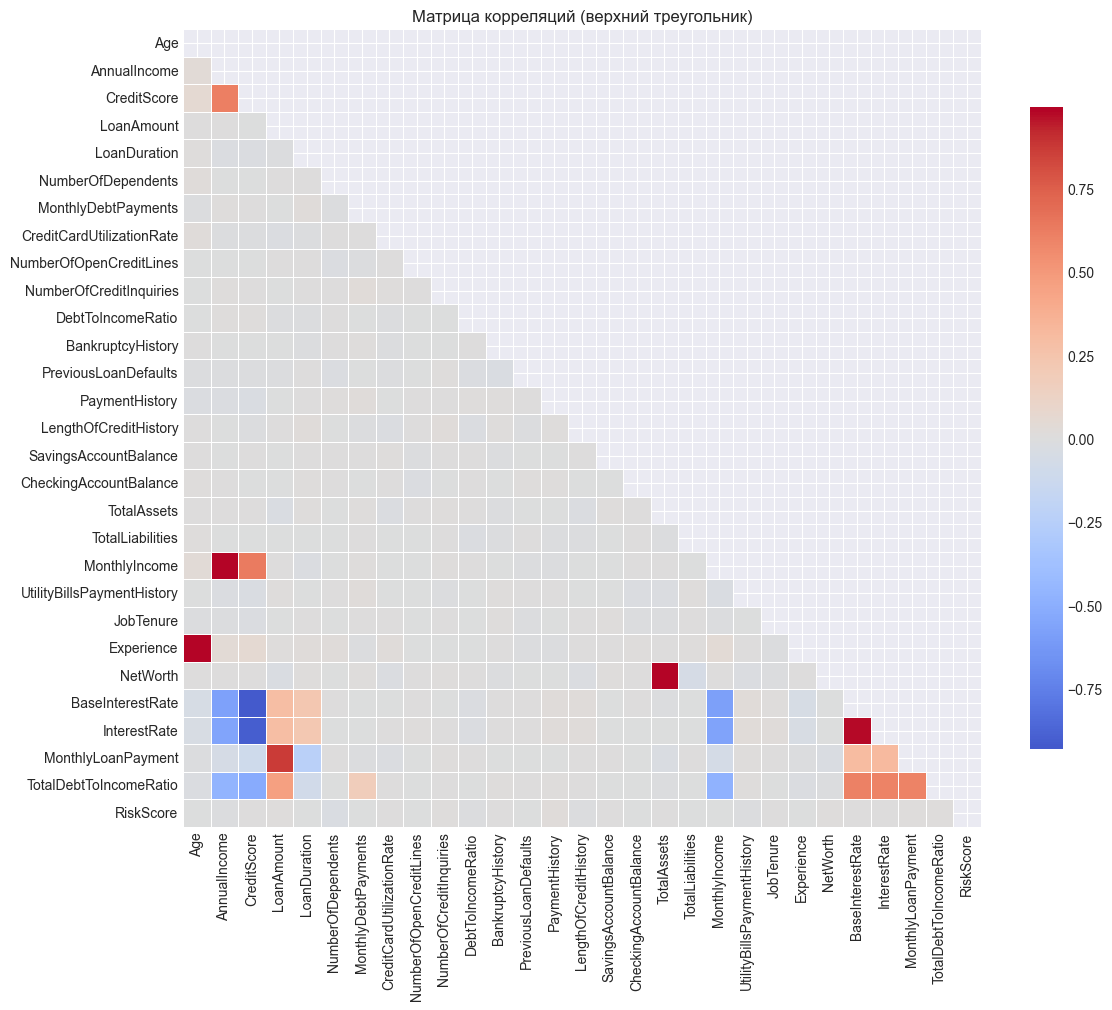

In [34]:
print("\n--- Анализ корреляций ---")
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
corr_matrix = df_train[numeric_cols].corr()

if 'RiskScore' in corr_matrix.columns:
    target_correlations = corr_matrix['RiskScore'].drop('RiskScore').abs().sort_values(ascending=False)
    print("Топ-15 признаков по абсолютной корреляции с RiskScore:")
    print(target_correlations.head(15))

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций (верхний треугольник)')
plt.tight_layout()
plt.show()


__5. Анализ отдельных признаков__


--- Анализ важных признаков ---


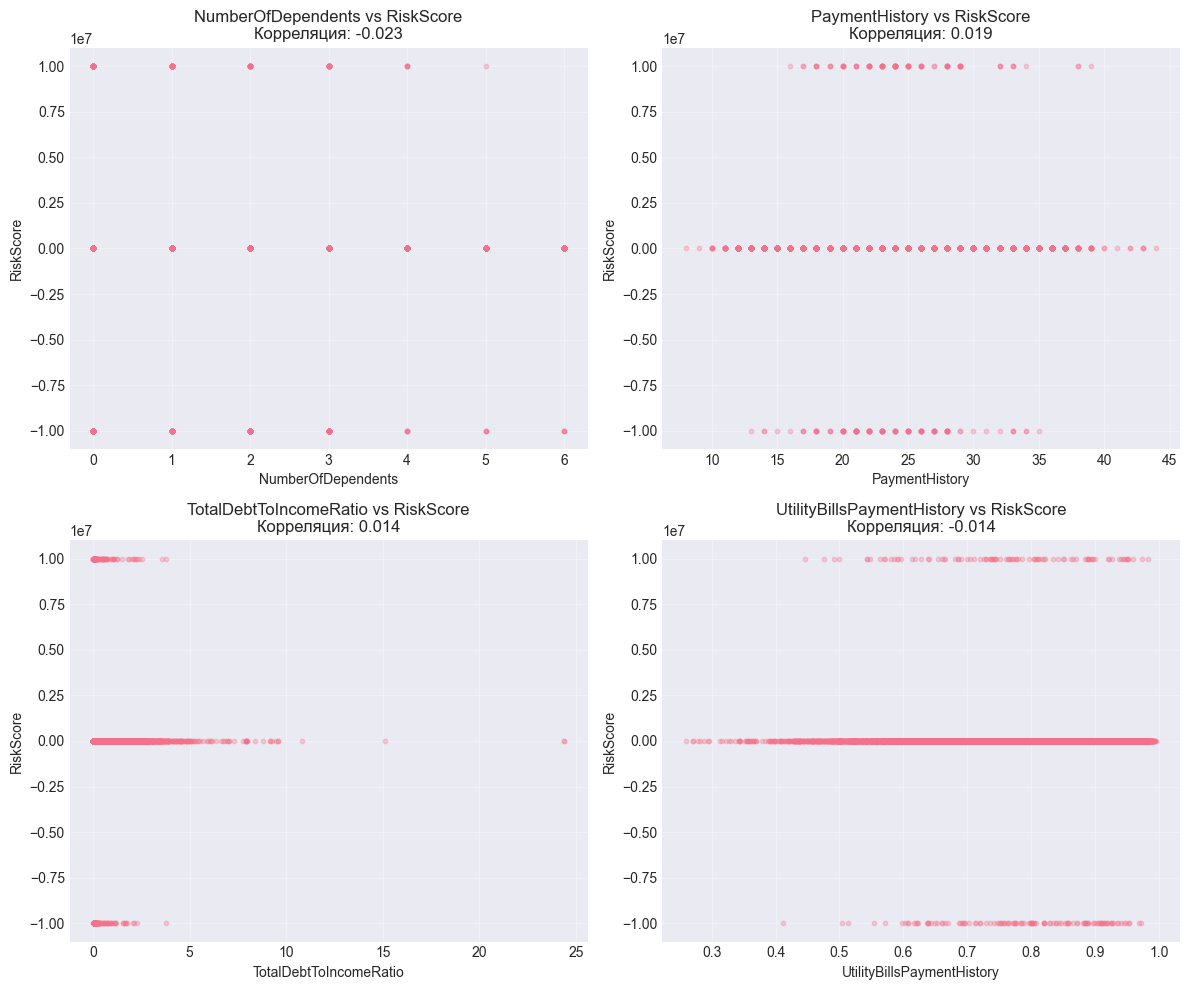

In [35]:
print("\n--- Анализ важных признаков ---")
top_features = target_correlations.head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df_train[feature], df_train['RiskScore'], alpha=0.3, s=10)

    z = np.polyfit(df_train[feature].fillna(0), df_train['RiskScore'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_train[feature].sort_values(), p(df_train[feature].sort_values()),
                   "r--", alpha=0.8, linewidth=2)

    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('RiskScore')
    axes[idx].set_title(f'{feature} vs RiskScore\nКорреляция: {corr_matrix.loc[feature, "RiskScore"]:.3f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


__6. Реализация метрик качества__

In [36]:
print("\n" + "=" * 80)
print("РЕАЛИЗАЦИЯ МЕТРИК КАЧЕСТВА")
print("=" * 80)

class RegressionMetrics:
    @staticmethod
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    @staticmethod
    def rmse(y_true, y_pred):
        return np.sqrt(RegressionMetrics.mse(y_true, y_pred))

    @staticmethod
    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    @staticmethod
    def r2(y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

    @staticmethod
    def mape(y_true, y_pred, epsilon=1e-8):
        mask = np.abs(y_true) > epsilon
        if np.sum(mask) == 0:
            return np.nan
        return 100 * np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))

    @staticmethod
    def smape(y_true, y_pred):
        denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
        mask = denominator > 0
        if np.sum(mask) == 0:
            return np.nan
        return 100 * np.mean(np.abs(y_true[mask] - y_pred[mask]) / denominator[mask])

    @staticmethod
    def calculate_all(y_true, y_pred, prefix=""):
        metrics = {
            f"{prefix}MSE": RegressionMetrics.mse(y_true, y_pred),
            f"{prefix}RMSE": RegressionMetrics.rmse(y_true, y_pred),
            f"{prefix}MAE": RegressionMetrics.mae(y_true, y_pred),
            f"{prefix}R2": RegressionMetrics.r2(y_true, y_pred),
            f"{prefix}MAPE": RegressionMetrics.mape(y_true, y_pred),
            f"{prefix}SMAPE": RegressionMetrics.smape(y_true, y_pred)
        }
        return metrics

print("\nТестирование реализации метрик:")

y_test_true = np.array([3.0, -0.5, 2.0, 7.0])
y_test_pred = np.array([2.5, 0.0, 2.0, 8.0])

my_metrics = RegressionMetrics.calculate_all(y_test_true, y_test_pred, "Наша_")

sklearn_metrics = {
    "Sklearn_MSE": mean_squared_error(y_test_true, y_test_pred),
    "Sklearn_MAE": mean_absolute_error(y_test_true, y_test_pred),
    "Sklearn_R2": r2_score(y_test_true, y_test_pred),
    "Sklearn_MAPE": mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
}

print("\nСравнение метрик:")
comparison_df = pd.DataFrame({
    "Наша реализация": list(my_metrics.values()),
    "Sklearn": [sklearn_metrics.get(k.replace("Наша_", "Sklearn_"), np.nan)
                for k in my_metrics.keys()]
}, index=[k.replace("Наша_", "") for k in my_metrics.keys()])

print(comparison_df)

tolerance = 1e-10
print(f"\nПроверка точности (допуск: {tolerance}):")
for metric_name in ["MSE", "MAE", "R2"]:
    our_val = my_metrics[f"Наша_{metric_name}"]
    sklearn_val = sklearn_metrics.get(f"Sklearn_{metric_name}", np.nan)
    diff = abs(our_val - sklearn_val)
    status = "✓" if diff < tolerance else "✗"
    print(f"{metric_name}: разница = {diff:.10f} {status}")



РЕАЛИЗАЦИЯ МЕТРИК КАЧЕСТВА

Тестирование реализации метрик:

Сравнение метрик:
       Наша реализация    Sklearn
MSE           0.375000   0.375000
RMSE          0.612372        NaN
MAE           0.500000   0.500000
R2            0.948608   0.948608
MAPE         32.738095  32.738095
SMAPE        57.878788        NaN

Проверка точности (допуск: 1e-10):
MSE: разница = 0.0000000000 ✓
MAE: разница = 0.0000000000 ✓
R2: разница = 0.0000000000 ✓


__7. Реализация нормализации__

In [37]:
print("\n" + "=" * 80)
print("РЕАЛИЗАЦИЯ НОРМАЛИЗАЦИИ ДАННЫХ")
print("=" * 80)

class DataNormalizer:
    def __init__(self, method='zscore'):
        self.method = method
        self.params = {}
        self.fitted = False

    def fit(self, X):
        if self.method == 'zscore':
            self.params['mean'] = np.nanmean(X, axis=0)
            self.params['std'] = np.nanstd(X, axis=0)
            self.params['std'][self.params['std'] == 0] = 1.0

        elif self.method == 'minmax':
            self.params['min'] = np.nanmin(X, axis=0)
            self.params['max'] = np.nanmax(X, axis=0)
            range_val = self.params['max'] - self.params['min']
            range_val[range_val == 0] = 1.0
            self.params['range'] = range_val

        elif self.method == 'robust':
            self.params['median'] = np.nanmedian(X, axis=0)
            self.params['q25'] = np.nanpercentile(X, 25, axis=0)
            self.params['q75'] = np.nanpercentile(X, 75, axis=0)
            iqr = self.params['q75'] - self.params['q25']
            iqr[iqr == 0] = 1.0
            self.params['iqr'] = iqr

        self.fitted = True
        return self

    def transform(self, X):
        if not self.fitted:
            raise ValueError("Сначала вызовите fit()")

        X_norm = X.copy()

        if self.method == 'zscore':
            X_norm = (X - self.params['mean']) / self.params['std']

        elif self.method == 'minmax':
            X_norm = (X - self.params['min']) / self.params['range']

        elif self.method == 'robust':
            X_norm = (X - self.params['median']) / self.params['iqr']

        X_norm = np.nan_to_num(X_norm, nan=0.0, posinf=0.0, neginf=0.0)
        return X_norm

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def inverse_transform(self, X_norm):
        if not self.fitted:
            raise ValueError("Сначала вызовите fit()")

        X = X_norm.copy()

        if self.method == 'zscore':
            X = X * self.params['std'] + self.params['mean']

        elif self.method == 'minmax':
            X = X * self.params['range'] + self.params['min']

        elif self.method == 'robust':
            X = X * self.params['iqr'] + self.params['median']

        return X

print("\nТестирование нормализатора:")
test_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)
print("Исходные данные:")
print(test_data)

print("\nZ-score нормализация:")
normalizer_z = DataNormalizer('zscore')
z_norm = normalizer_z.fit_transform(test_data)
display(z_norm)
display(f"Среднее: {np.mean(z_norm, axis=0)}")
display(f"Стд: {np.std(z_norm, axis=0)}")

print("\nMin-Max нормализация:")
normalizer_mm = DataNormalizer('minmax')
mm_norm = normalizer_mm.fit_transform(test_data)
display(mm_norm)
display(f"Минимум: {np.min(mm_norm, axis=0)}")
display(f"Максимум: {np.max(mm_norm, axis=0)}")

print("\nПроверка обратного преобразования (Z-score):")
reconstructed = normalizer_z.inverse_transform(z_norm)
display("Восстановленные данные:")
display(reconstructed)
display(f"Совпадают с исходными: {np.allclose(test_data, reconstructed, rtol=1e-10)}")



РЕАЛИЗАЦИЯ НОРМАЛИЗАЦИИ ДАННЫХ

Тестирование нормализатора:
Исходные данные:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Z-score нормализация:


array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

'Среднее: [0. 0. 0.]'

'Стд: [1. 1. 1.]'


Min-Max нормализация:


array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])

'Минимум: [0. 0. 0.]'

'Максимум: [1. 1. 1.]'


Проверка обратного преобразования (Z-score):


'Восстановленные данные:'

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

'Совпадают с исходными: True'

__8. Реализация линейной регресии__


РЕАЛИЗАЦИЯ ЛИНЕЙНОЙ РЕГРЕССИИ

Тестирование линейной регрессии:


'Сгенерировано 100 samples с 3 признаками'

'Истинные веса: [ 2.5 -1.3  0.8], bias: 3.0'


--- Метод: analytical ---
Используется аналитическое решение...
MSE: 0.007568
R²: 0.998865
Веса: [ 2.49223367 -1.30499636  0.78924067]
Bias: 3.0113

--- Метод: gradient_descent ---
Используется градиентный спуск (lr=0.1, iterations=1000)...
Ранняя остановка на итерации 90
MSE: 0.007635
R²: 0.998855
Веса: [ 2.48258764 -1.30743333  0.78682601]
Bias: 3.0124


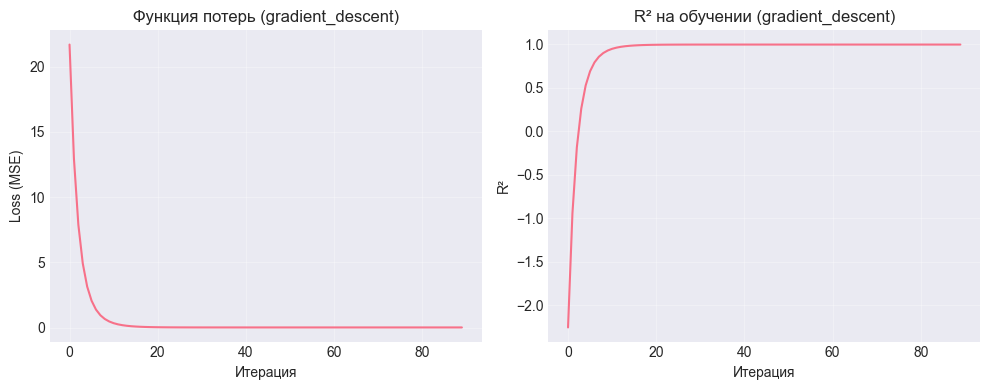


--- Метод: sgd ---
Используется SGD (lr=0.1, batch_size=32)...
MSE: 0.008306
R²: 0.998754
Веса: [ 2.50978194 -1.29955612  0.7740233 ]
Bias: 3.0239


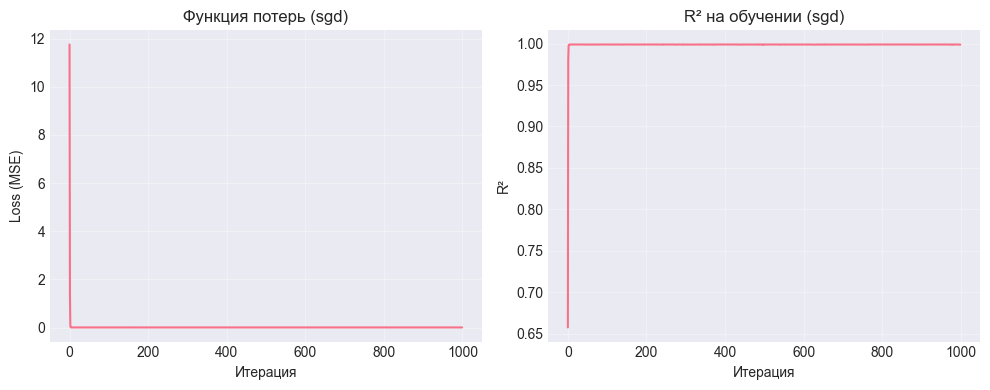


--- Сравнение со sklearn ---


'Sklearn MSE: 0.007568'

'Sklearn R²: 0.998865'

'Sklearn веса: [ 2.49223367 -1.30499636  0.78924067]'

'Sklearn bias: 3.0113'


Сравнение MSE разных методов:
analytical           MSE: 0.007568 (разница: 0.000000)
gradient_descent     MSE: 0.007635 (разница: 0.000067)
sgd                  MSE: 0.008306 (разница: 0.000738)


In [38]:
print("\n" + "=" * 80)
print("РЕАЛИЗАЦИЯ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("=" * 80)

class LinearRegressionModel:

    def __init__(self, method='analytical', learning_rate=0.01,
                 n_iterations=1000, batch_size=32,
                 regularization=None, lambda_reg=0.01, p_norm=2,
                 early_stopping=False, patience=10, tol=1e-4):

        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.p_norm = p_norm
        self.early_stopping = early_stopping
        self.patience = patience
        self.tol = tol

        self.weights = None
        self.bias = None
        self.loss_history = []
        self.train_r2_history = []

        self.best_weights = None
        self.best_bias = None
        self.best_loss = np.inf
        self.wait = 0

    def _initialize_parameters(self, n_features):
        limit = np.sqrt(6 / (n_features + 1))
        self.weights = np.random.uniform(-limit, limit, n_features)
        self.bias = 0.0

    def _compute_loss(self, y_true, y_pred, weights):

        m = len(y_true)
        mse = np.mean((y_true - y_pred) ** 2)

        reg_term = 0
        if self.regularization == 'l1':
            reg_term = self.lambda_reg * np.sum(np.abs(weights))
        elif self.regularization == 'l2':
            reg_term = self.lambda_reg * np.sum(weights ** 2)
        elif self.regularization == 'elastic':
            reg_term = self.lambda_reg * (0.5 * np.sum(np.abs(weights)) + 0.5 * np.sum(weights ** 2))
        elif self.regularization == 'lp':
            reg_term = self.lambda_reg * np.sum(np.abs(weights) ** self.p_norm)

        return mse + reg_term

    def _compute_gradients(self, X, y_true, y_pred, weights):
        m = len(y_true)

        dw = (2/m) * X.T @ (y_pred - y_true)
        db = (2/m) * np.sum(y_pred - y_true)

        if self.regularization == 'l1':
            dw += self.lambda_reg * np.sign(weights)
        elif self.regularization == 'l2':
            dw += 2 * self.lambda_reg * weights
        elif self.regularization == 'elastic':
            dw += self.lambda_reg * (0.5 * np.sign(weights) + weights)
        elif self.regularization == 'lp':
            dw += self.lambda_reg * self.p_norm * np.sign(weights) * (
                np.abs(weights) ** (self.p_norm - 1))

        return dw, db

    def _analytical_solution(self, X, y):

        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.regularization == 'l2':
            I = np.eye(X_b.shape[1])
            I[0, 0] = 0
            theta = np.linalg.pinv(X_b.T @ X_b + self.lambda_reg * I) @ X_b.T @ y
        else:
            theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

        self.bias = theta[0]
        self.weights = theta[1:]

    def _gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)

        for i in range(self.n_iterations):
            y_pred = X @ self.weights + self.bias

            dw, db = self._compute_gradients(X, y, y_pred, self.weights)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            current_loss = self._compute_loss(y, y_pred, self.weights)
            self.loss_history.append(current_loss)

            train_r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
            self.train_r2_history.append(train_r2)

            if self.early_stopping:
                if current_loss < self.best_loss - self.tol:
                    self.best_loss = current_loss
                    self.best_weights = self.weights.copy()
                    self.best_bias = self.bias
                    self.wait = 0
                else:
                    self.wait += 1

                if self.wait >= self.patience:
                    print(f"Ранняя остановка на итерации {i+1}")
                    self.weights = self.best_weights
                    self.bias = self.best_bias
                    break

    def _stochastic_gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)

        for i in range(self.n_iterations):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0

            for j in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[j:j+self.batch_size]
                y_batch = y_shuffled[j:j+self.batch_size]

                y_pred = X_batch @ self.weights + self.bias

                dw, db = self._compute_gradients(X_batch, y_batch, y_pred, self.weights)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

                batch_loss = self._compute_loss(y_batch, y_pred, self.weights)
                epoch_loss += batch_loss * len(y_batch)

            epoch_loss /= n_samples
            self.loss_history.append(epoch_loss)

            y_pred_all = X @ self.weights + self.bias
            train_r2 = 1 - np.sum((y - y_pred_all) ** 2) / np.sum((y - np.mean(y)) ** 2)
            self.train_r2_history.append(train_r2)

    def fit(self, X, y, verbose=False):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)

        if len(X) != len(y):
            raise ValueError("X и y должны иметь одинаковое количество samples")

        if self.method == 'analytical':
            if verbose:
                print("Используется аналитическое решение...")
            self._analytical_solution(X, y)

        elif self.method == 'gradient_descent':
            if verbose:
                print(f"Используется градиентный спуск (lr={self.learning_rate}, iterations={self.n_iterations})...")
            self._gradient_descent(X, y)

        elif self.method == 'sgd':
            if verbose:
                print(f"Используется SGD (lr={self.learning_rate}, batch_size={self.batch_size})...")
            self._stochastic_gradient_descent(X, y)

        else:
            raise ValueError(f"Неизвестный метод: {self.method}")

        return self

    def predict(self, X):
        if self.weights is None or self.bias is None:
            raise ValueError("Модель не обучена. Сначала вызовите fit()")

        X = np.asarray(X, dtype=np.float64)
        return X @ self.weights + self.bias

    def get_coefficients(self):
        return self.weights, self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        return RegressionMetrics.r2(y, y_pred)

print("\nТестирование линейной регрессии:")

np.random.seed(42)
n_samples = 100
n_features = 3

true_weights = np.array([2.5, -1.3, 0.8])
true_bias = 3.0

X_synth = np.random.randn(n_samples, n_features)
noise = np.random.randn(n_samples) * 0.1
y_synth = X_synth @ true_weights + true_bias + noise

display(f"Сгенерировано {n_samples} samples с {n_features} признаками")
display(f"Истинные веса: {true_weights}, bias: {true_bias}")

methods = ['analytical', 'gradient_descent', 'sgd']
results = {}

for method in methods:
    print(f"\n--- Метод: {method} ---")

    if method == 'analytical':
        model = LinearRegressionModel(method=method)
    else:
        model = LinearRegressionModel(
            method=method,
            learning_rate=0.1,
            n_iterations=1000,
            early_stopping=True,
            patience=50
        )

    model.fit(X_synth, y_synth, verbose=True)
    y_pred = model.predict(X_synth)

    weights, bias = model.get_coefficients()
    mse = RegressionMetrics.mse(y_synth, y_pred)
    r2 = RegressionMetrics.r2(y_synth, y_pred)

    results[method] = {
        'MSE': mse,
        'R2': r2,
        'weights': weights,
        'bias': bias
    }

    print(f"MSE: {mse:.6f}")
    print(f"R²: {r2:.6f}")
    print(f"Веса: {weights}")
    print(f"Bias: {bias:.4f}")

    if method in ['gradient_descent', 'sgd'] and len(model.loss_history) > 0:
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.plot(model.loss_history)
        plt.xlabel('Итерация')
        plt.ylabel('Loss (MSE)')
        plt.title(f'Функция потерь ({method})')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(model.train_r2_history)
        plt.xlabel('Итерация')
        plt.ylabel('R²')
        plt.title(f'R² на обучении ({method})')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

print("\n--- Сравнение со sklearn ---")
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_synth, y_synth)
y_pred_sklearn = sklearn_model.predict(X_synth)

sklearn_mse = mean_squared_error(y_synth, y_pred_sklearn)
sklearn_r2 = r2_score(y_synth, y_pred_sklearn)

display(f"Sklearn MSE: {sklearn_mse:.6f}")
display(f"Sklearn R²: {sklearn_r2:.6f}")
display(f"Sklearn веса: {sklearn_model.coef_}")
display(f"Sklearn bias: {sklearn_model.intercept_:.4f}")

print("\nСравнение MSE разных методов:")
for method, res in results.items():
    diff = abs(res['MSE'] - sklearn_mse)
    print(f"{method:20} MSE: {res['MSE']:.6f} (разница: {diff:.6f})")


__9. Реализация кросс-валидации__


РЕАЛИЗАЦИЯ КРОСС-ВАЛИДАЦИИ

Тестирование кросс-валидации:

1. K-Fold кросс-валидация (k=5):
Кросс-валидация (5 фолдов, метрика: mse)...
  Фолд 1: mse = 0.2244
  Фолд 2: mse = 0.3143
  Фолд 3: mse = 0.2639
  Фолд 4: mse = 0.3046
  Фолд 5: mse = 0.4114
Среднее mse: 0.3037 ± 0.0626

2. Стратифицированная K-Fold (k=5, n_bins=5):
Кросс-валидация (5 фолдов, метрика: mse)...
  Фолд 1: mse = 0.2248
  Фолд 2: mse = 0.4686
  Фолд 3: mse = 0.2455
  Фолд 4: mse = 0.2678
  Фолд 5: mse = 0.3655
Среднее mse: 0.3145 ± 0.0909

3. Leave-One-Out кросс-валидация:
Кросс-валидация (30 фолдов, метрика: mse)...
  Фолд 1: mse = 0.4074
  Фолд 2: mse = 0.0094
  Фолд 3: mse = 0.4193
  Фолд 4: mse = 1.5688
  Фолд 5: mse = 0.5428
  Фолд 6: mse = 0.1792
  Фолд 7: mse = 0.0087
  Фолд 8: mse = 0.0007
  Фолд 9: mse = 0.1950
  Фолд 10: mse = 0.5149
  Фолд 11: mse = 0.0001
  Фолд 12: mse = 0.0555
  Фолд 13: mse = 0.6268
  Фолд 14: mse = 0.8594
  Фолд 15: mse = 0.0134
  Фолд 16: mse = 0.0201
  Фолд 17: mse = 0.0119
  Фол

'Sklearn KFold MSE: 0.2978 ± 0.0912'

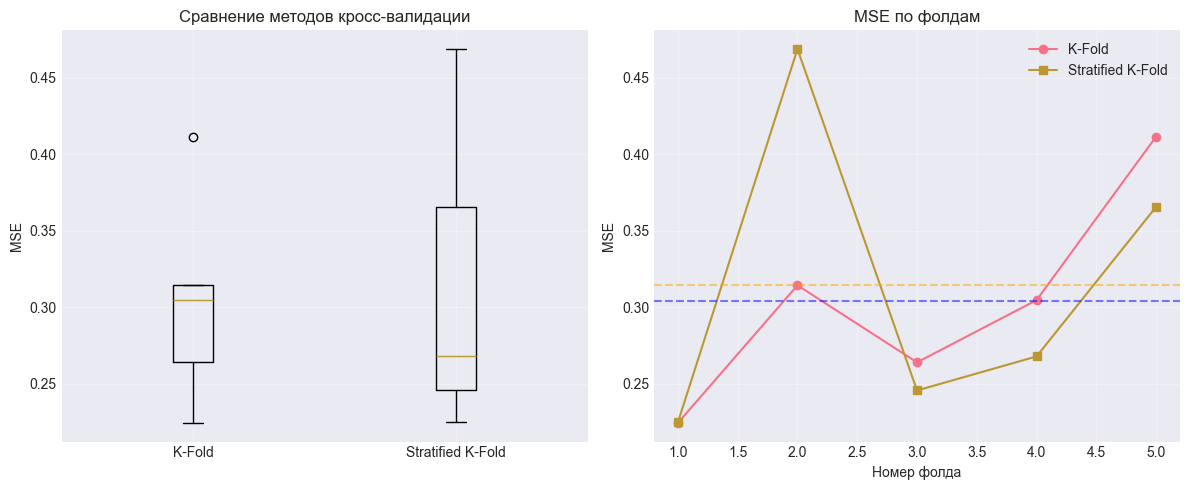

In [39]:
print("\n" + "=" * 80)
print("РЕАЛИЗАЦИЯ КРОСС-ВАЛИДАЦИИ")
print("=" * 80)

class CrossValidation:

    @staticmethod
    def k_fold_split(X, y, k=5, shuffle=True, random_state=None):
        n_samples = len(X)

        if shuffle:
            if random_state is not None:
                np.random.seed(random_state)
            indices = np.random.permutation(n_samples)
        else:
            indices = np.arange(n_samples)

        fold_size = n_samples // k
        folds = []

        for i in range(k):
            test_start = i * fold_size
            test_end = test_start + fold_size if i < k - 1 else n_samples
            test_idx = indices[test_start:test_end]

            train_idx = np.concatenate([indices[:test_start], indices[test_end:]])

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            folds.append((X_train, y_train, X_test, y_test))

        return folds

    @staticmethod
    def leave_one_out_split(X, y):

        n_samples = len(X)
        folds = []

        for i in range(n_samples):
            test_idx = [i]
            train_idx = list(range(i)) + list(range(i + 1, n_samples))

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            folds.append((X_train, y_train, X_test, y_test))

        return folds

    @staticmethod
    def stratified_k_fold_split(X, y, k=5, n_bins=10, shuffle=True, random_state=None):

        if n_bins > len(y):
            n_bins = len(y)

        y_bins = pd.qcut(y, q=n_bins, labels=False, duplicates='drop')

        bin_indices = {}
        for bin_idx in np.unique(y_bins):
            bin_indices[bin_idx] = np.where(y_bins == bin_idx)[0]

        folds = [[] for _ in range(k)]

        for bin_idx, indices in bin_indices.items():
            if shuffle:
                if random_state is not None:
                    np.random.seed(random_state + bin_idx)
                np.random.shuffle(indices)

            for i, idx in enumerate(indices):
                fold_idx = i % k
                folds[fold_idx].append(idx)

        result_folds = []
        for i in range(k):
            test_idx = np.array(folds[i])
            train_idx = np.concatenate([np.array(folds[j]) for j in range(k) if j != i])

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            result_folds.append((X_train, y_train, X_test, y_test))

        return result_folds

    @staticmethod
    def cross_val_score(model, X, y, cv=5, scoring='mse',
                        stratified=False, n_bins=10, shuffle=True,
                        random_state=None, verbose=False):

        if scoring == 'mse':
            metric_func = RegressionMetrics.mse
        elif scoring == 'rmse':
            metric_func = RegressionMetrics.rmse
        elif scoring == 'mae':
            metric_func = RegressionMetrics.mae
        elif scoring == 'r2':
            metric_func = RegressionMetrics.r2
        elif scoring == 'mape':
            metric_func = lambda y_true, y_pred: RegressionMetrics.mape(y_true, y_pred)
        else:
            raise ValueError(f"Неизвестная метрика: {scoring}")

        if cv == 'loo' or cv == len(X):
            folds = CrossValidation.leave_one_out_split(X, y)
            k = len(X)
        elif stratified:
            folds = CrossValidation.stratified_k_fold_split(
                X, y, k=cv, n_bins=n_bins, shuffle=shuffle, random_state=random_state
            )
            k = cv
        else:
            folds = CrossValidation.k_fold_split(
                X, y, k=cv, shuffle=shuffle, random_state=random_state
            )
            k = cv

        scores = []

        if verbose:
            print(f"Кросс-валидация ({k} фолдов, метрика: {scoring})...")

        for fold_idx, (X_train, y_train, X_test, y_test) in enumerate(folds):
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            score = metric_func(y_test, y_pred)
            scores.append(score)

            if verbose:
                print(f"  Фолд {fold_idx+1}: {scoring} = {score:.4f}")

        scores = np.array(scores)
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        if verbose:
            print(f"Среднее {scoring}: {mean_score:.4f} ± {std_score:.4f}")

        return scores, mean_score, std_score

print("\nТестирование кросс-валидации:")

X_cv = np.random.randn(100, 5)
true_coefs = np.array([1.5, -0.8, 2.3, 0.4, -1.2])
y_cv = X_cv @ true_coefs + 2.5 + np.random.randn(100) * 0.5

print("\n1. K-Fold кросс-валидация (k=5):")
model = LinearRegressionModel(method='analytical')
scores_kfold, mean_kfold, std_kfold = CrossValidation.cross_val_score(
    model, X_cv, y_cv, cv=5, scoring='mse', verbose=True
)

print("\n2. Стратифицированная K-Fold (k=5, n_bins=5):")
scores_strat, mean_strat, std_strat = CrossValidation.cross_val_score(
    model, X_cv, y_cv, cv=5, scoring='mse', stratified=True,
    n_bins=5, verbose=True
)


print("\n3. Leave-One-Out кросс-валидация:")
X_cv_small = X_cv[:30]
y_cv_small = y_cv[:30]
scores_loo, mean_loo, std_loo = CrossValidation.cross_val_score(
    model, X_cv_small, y_cv_small, cv='loo', scoring='mse', verbose=True
)

print("\n4. Сравнение со sklearn KFold:")
from sklearn.model_selection import cross_val_score as sklearn_cv_score

sklearn_model = SklearnLinearRegression()
sklearn_scores = -sklearn_cv_score(
    sklearn_model, X_cv, y_cv,
    cv=5, scoring='neg_mean_squared_error'
)
display(f"Sklearn KFold MSE: {np.mean(sklearn_scores):.4f} ± {np.std(sklearn_scores):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

methods_data = [scores_kfold, scores_strat]
method_names = ['K-Fold', 'Stratified K-Fold']

axes[0].boxplot(methods_data, labels=method_names)
axes[0].set_ylabel('MSE')
axes[0].set_title('Сравнение методов кросс-валидации')
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(scores_kfold) + 1), scores_kfold, 'o-', label='K-Fold')
axes[1].plot(range(1, len(scores_strat) + 1), scores_strat, 's-', label='Stratified K-Fold')
axes[1].axhline(y=np.mean(scores_kfold), color='blue', linestyle='--', alpha=0.5)
axes[1].axhline(y=np.mean(scores_strat), color='orange', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Номер фолда')
axes[1].set_ylabel('MSE')
axes[1].set_title('MSE по фолдам')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


__10. Подготовка данных для соревнования__

In [46]:
print("\n" + "=" * 80)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ СОРЕВНОВАНИЯ KAGGLE")
print("=" * 80)

class DataPreprocessor:

    def __init__(self, target_column='RiskScore'):
        self.target_column = target_column
        self.numeric_imputer = {}
        self.categorical_imputer = {}
        self.encoder = None
        self.scaler = None
        self.feature_names = None
        self.categorical_columns = None

    def preprocess_train(self, df, remove_outliers=True):
        df_clean = df.copy()

        print("Начальная обработка обучающих данных...")

        initial_size = len(df_clean)
        df_clean = df_clean.drop_duplicates()
        display(f"  Удалено дубликатов: {initial_size - len(df_clean)}")

        if 'id' in df_clean.columns:
            self.train_ids = df_clean['id'].copy()
            df_clean = df_clean.drop('id', axis=1)
            print("  Колонка 'id' сохранена для тренировочных данных")

        if self.target_column in df_clean.columns:
            missing_target = df_clean[self.target_column].isnull().sum()
            df_clean = df_clean.dropna(subset=[self.target_column])
            display(f"  Удалено строк с пропусками в {self.target_column}: {missing_target}")

            print(f"\n  Статистика {self.target_column} ДО очистки:")
            print(f"    Минимум: {df_clean[self.target_column].min():.2f}")
            print(f"    Максимум: {df_clean[self.target_column].max():.2f}")
            print(f"    Среднее: {df_clean[self.target_column].mean():.2f}")
            print(f"    Медиана: {df_clean[self.target_column].median():.2f}")

            if remove_outliers:
                before = len(df_clean)
                df_clean = df_clean[df_clean[self.target_column].abs() <= 200]
                outliers_removed = before - len(df_clean)
                display(f"  Удалено строк с |{self.target_column}| > 200: {outliers_removed}")

                print(f"\n  Статистика {self.target_column} ПОСЛЕ очистки:")
                print(f"    Минимум: {df_clean[self.target_column].min():.2f}")
                print(f"    Максимум: {df_clean[self.target_column].max():.2f}")
                print(f"    Среднее: {df_clean[self.target_column].mean():.2f}")
                print(f"    Медиана: {df_clean[self.target_column].median():.2f}")
                print(f"    Всего удалено строк: {initial_size - len(df_clean)}")
                print(f"    Осталось строк: {len(df_clean)}")

        if 'ApplicationDate' in df_clean.columns:
            try:
                df_clean['ApplicationDate'] = pd.to_datetime(df_clean['ApplicationDate'], errors='coerce')
                df_clean['ApplicationYear'] = df_clean['ApplicationDate'].dt.year
                df_clean['ApplicationMonth'] = df_clean['ApplicationDate'].dt.month
                df_clean['ApplicationDay'] = df_clean['ApplicationDate'].dt.day
                df_clean['ApplicationDayOfWeek'] = df_clean['ApplicationDate'].dt.dayofweek
                df_clean = df_clean.drop('ApplicationDate', axis=1)
                print("  Обработана колонка ApplicationDate")
            except:
                print("  Не удалось обработать ApplicationDate")
                df_clean = df_clean.drop('ApplicationDate', axis=1)

        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

        if self.target_column in numeric_cols:
            numeric_cols.remove(self.target_column)

        self.categorical_columns = categorical_cols
        display(f"  Найдено числовых признаков: {len(numeric_cols)}")
        display(f"  Найдено категориальных признаков: {len(categorical_cols)}")

        print("  Заполнение пропусков в числовых признаках...")
        for col in numeric_cols:
            if df_clean[col].isnull().sum() > 0:
                median_val = df_clean[col].median()
                if pd.isna(median_val):
                    median_val = 0
                self.numeric_imputer[col] = median_val
                df_clean[col] = df_clean[col].fillna(median_val)
                display(f"    {col}: заполнено медианой {median_val:.2f}")

        print("  Заполнение пропусков в категориальных признаках...")
        for col in categorical_cols:
            if df_clean[col].isnull().sum() > 0:
                mode_val = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
                self.categorical_imputer[col] = mode_val
                df_clean[col] = df_clean[col].fillna(mode_val)
                display(f"    {col}: заполнено модой '{mode_val}'")


        print("  Проверка на скошенность признаков...")
        skewed_cols = []
        skew_threshold = 1.0

        for col in numeric_cols:
            if df_clean[col].skew() > skew_threshold:

                if (df_clean[col] > 0).all():
                    df_clean[f'{col}_log'] = np.log1p(df_clean[col])
                    skewed_cols.append(col)
                    display(f"    {col}: логарифмирован (скошенность: {df_clean[col].skew():.2f})")

        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
        if self.target_column in numeric_cols:
            numeric_cols.remove(self.target_column)

        print("  One-Hot Encoding категориальных признаков...")
        if categorical_cols:
            self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            encoded_data = self.encoder.fit_transform(df_clean[categorical_cols])
            encoded_cols = self.encoder.get_feature_names_out(categorical_cols)

            df_clean = df_clean.drop(categorical_cols, axis=1)

            encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_clean.index)
            df_clean = pd.concat([df_clean, encoded_df], axis=1)

            display(f"  Создано {len(encoded_cols)} новых бинарных признаков")

        if self.target_column in df_clean.columns:
            y = df_clean[self.target_column].values
            X = df_clean.drop(self.target_column, axis=1)
        else:
            y = None
            X = df_clean

        self.feature_names = X.columns.tolist()

        print("  Нормализация данных...")
        X_values = X.values.astype(np.float64)

        X_values = np.nan_to_num(X_values, nan=0.0, posinf=0.0, neginf=0.0)

        self.scaler = DataNormalizer(method='zscore')
        X_scaled = self.scaler.fit_transform(X_values)

        print(f"\nИтоговые размеры:")
        display(f"  X: {X_scaled.shape}")
        display(f"  y: {y.shape if y is not None else 'N/A'}")
        display(f"  Количество признаков: {X_scaled.shape[1]}")

        return X_scaled, y

    def preprocess_test(self, df):
        print("\nПредобработка тестовых данных...")
        df_clean = df.copy()

        if 'id' in df_clean.columns:
            self.test_ids = df_clean['id'].copy()
            df_clean = df_clean.drop('id', axis=1)
            print("  Колонка 'id' сохранена для тестовых данных")

        if 'ApplicationDate' in df_clean.columns:
            try:
                df_clean['ApplicationDate'] = pd.to_datetime(df_clean['ApplicationDate'], errors='coerce')
                df_clean['ApplicationYear'] = df_clean['ApplicationDate'].dt.year
                df_clean['ApplicationMonth'] = df_clean['ApplicationDate'].dt.month
                df_clean['ApplicationDay'] = df_clean['ApplicationDate'].dt.day
                df_clean['ApplicationDayOfWeek'] = df_clean['ApplicationDate'].dt.dayofweek
                df_clean = df_clean.drop('ApplicationDate', axis=1)
                print("  Обработана колонка ApplicationDate")
            except:
                print("  Не удалось обработать ApplicationDate")
                df_clean = df_clean.drop('ApplicationDate', axis=1)

        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

        print("  Заполнение пропусков в числовых признаках...")
        for col in numeric_cols:
            if col in self.numeric_imputer and df_clean[col].isnull().sum() > 0:
                df_clean[col] = df_clean[col].fillna(self.numeric_imputer[col])

        print("  Заполнение пропусков в категориальных признаках...")
        for col in categorical_cols:
            if col in self.categorical_imputer and df_clean[col].isnull().sum() > 0:
                df_clean[col] = df_clean[col].fillna(self.categorical_imputer[col])

        log_cols = [col for col in df_clean.columns if col.endswith('_log')]
        for col in log_cols:
            base_col = col.replace('_log', '')
            if base_col in df_clean.columns and (df_clean[base_col] > 0).all():
                df_clean[col] = np.log1p(df_clean[base_col])

        print("  One-Hot Encoding категориальных признаков...")
        if self.encoder is not None and self.categorical_columns:
            missing_cols = [col for col in self.categorical_columns if col not in df_clean.columns]

            if missing_cols:
                print(f"  ВНИМАНИЕ: В тестовых данных отсутствуют колонки: {missing_cols}")
                for col in missing_cols:
                    mode_val = self.categorical_imputer.get(col, 'Unknown')
                    df_clean[col] = mode_val
                    display(f"    Добавлена колонка {col} со значением '{mode_val}'")

            train_categorical = [col for col in self.categorical_columns if col in df_clean.columns]

            if train_categorical:
                encoded_data = self.encoder.transform(df_clean[train_categorical])
                encoded_cols = self.encoder.get_feature_names_out(train_categorical)

                df_clean = df_clean.drop(train_categorical, axis=1)

                encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_clean.index)
                df_clean = pd.concat([df_clean, encoded_df], axis=1)

                display(f"  Создано {len(encoded_cols)} бинарных признаков")

        print("  Выравнивание признаков по тренировочным данным...")
        if self.feature_names:
            missing_features = [f for f in self.feature_names if f not in df_clean.columns]
            if missing_features:
                display(f"  Добавлено отсутствующих признаков: {len(missing_features)}")
                for feature in missing_features:
                    df_clean[feature] = 0


            extra_features = [f for f in df_clean.columns if f not in self.feature_names]
            if extra_features:
                display(f"  Удалено лишних признаков: {len(extra_features)}")
                df_clean = df_clean.drop(extra_features, axis=1)

            df_clean = df_clean[self.feature_names]

        X_test = df_clean.values.astype(np.float64)

        X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

        if self.scaler is not None:
            X_test_scaled = self.scaler.transform(X_test)
        else:
            X_test_scaled = X_test

        display(f"\nТестовые данные обработаны:")
        display(f"  Размер: {X_test_scaled.shape}")
        display(f"  Количество признаков: {X_test_scaled.shape[1]}")

        return X_test_scaled

print("\nПредобработка данных...")
preprocessor = DataPreprocessor(target_column='RiskScore')

X_train_processed, y_train_processed = preprocessor.preprocess_train(df_train, remove_outliers=True)

X_test_processed = preprocessor.preprocess_test(df_test)

print(f"\nПроверка размерностей:")
display(f"X_train shape: {X_train_processed.shape}")
display(f"y_train shape: {y_train_processed.shape}")
display(f"X_test shape: {X_test_processed.shape}")

print(f"\nПроверка данных:")
display(f"NaN в X_train: {np.isnan(X_train_processed).sum()}")
display(f"Inf в X_train: {np.isinf(X_train_processed).sum()}")
display(f"NaN в X_test: {np.isnan(X_test_processed).sum()}")
display(f"Inf в X_test: {np.isinf(X_test_processed).sum()}")

print(f"\nСтатистика целевой переменной после очистки:")
print(f"  Минимум: {np.min(y_train_processed):.2f}")
print(f"  Максимум: {np.max(y_train_processed):.2f}")
print(f"  Среднее: {np.mean(y_train_processed):.2f}")
print(f"  Медиана: {np.median(y_train_processed):.2f}")
print(f"  Стандартное отклонение: {np.std(y_train_processed):.2f}")
print(f"  Количество значений: {len(y_train_processed)}")


ПОДГОТОВКА ДАННЫХ ДЛЯ СОРЕВНОВАНИЯ KAGGLE

Предобработка данных...
Начальная обработка обучающих данных...


'  Удалено дубликатов: 1016'

'  Удалено строк с пропусками в RiskScore: 1'


  Статистика RiskScore ДО очистки:
    Минимум: -9999999.00
    Максимум: 10000000.00
    Среднее: -29952.69
    Медиана: 44.10


'  Удалено строк с |RiskScore| > 200: 212'


  Статистика RiskScore ПОСЛЕ очистки:
    Минимум: 14.84
    Максимум: 97.60
    Среднее: 48.33
    Медиана: 44.18
    Всего удалено строк: 1229
    Осталось строк: 9788
  Обработана колонка ApplicationDate


'  Найдено числовых признаков: 32'

'  Найдено категориальных признаков: 5'

  Заполнение пропусков в числовых признаках...


'    CreditScore: заполнено медианой 723.00'

'    LoanAmount: заполнено медианой 21814.00'

'    MonthlyDebtPayments: заполнено медианой 399.00'

'    BankruptcyHistory: заполнено медианой 0.00'

'    CheckingAccountBalance: заполнено медианой 1118.50'

'    TotalAssets: заполнено медианой 60723.50'

'    NetWorth: заполнено медианой 27560.50'

'    BaseInterestRate: заполнено медианой 0.18'

  Заполнение пропусков в категориальных признаках...


"    LoanPurpose: заполнено модой 'Home'"

  Проверка на скошенность признаков...


'    LoanAmount: логарифмирован (скошенность: 3.41)'

'    MonthlyDebtPayments: логарифмирован (скошенность: 3.63)'

'    SavingsAccountBalance: логарифмирован (скошенность: 6.66)'

'    CheckingAccountBalance: логарифмирован (скошенность: 9.40)'

'    TotalAssets: логарифмирован (скошенность: 10.74)'

'    TotalLiabilities: логарифмирован (скошенность: 18.21)'

'    NetWorth: логарифмирован (скошенность: 11.08)'

'    MonthlyLoanPayment: логарифмирован (скошенность: 5.23)'

'    TotalDebtToIncomeRatio: логарифмирован (скошенность: 6.01)'

  One-Hot Encoding категориальных признаков...


'  Создано 21 новых бинарных признаков'

  Нормализация данных...

Итоговые размеры:


'  X: (9788, 62)'

'  y: (9788,)'

'  Количество признаков: 62'


Предобработка тестовых данных...
  Обработана колонка ApplicationDate
  Заполнение пропусков в числовых признаках...
  Заполнение пропусков в категориальных признаках...
  One-Hot Encoding категориальных признаков...


'  Создано 21 бинарных признаков'

  Выравнивание признаков по тренировочным данным...


'  Добавлено отсутствующих признаков: 9'

'  Удалено лишних признаков: 1'

'\nТестовые данные обработаны:'

'  Размер: (5000, 62)'

'  Количество признаков: 62'


Проверка размерностей:


'X_train shape: (9788, 62)'

'y_train shape: (9788,)'

'X_test shape: (5000, 62)'


Проверка данных:


'NaN в X_train: 0'

'Inf в X_train: 0'

'NaN в X_test: 0'

'Inf в X_test: 0'


Статистика целевой переменной после очистки:
  Минимум: 14.84
  Максимум: 97.60
  Среднее: 48.33
  Медиана: 44.18
  Стандартное отклонение: 17.23
  Количество значений: 9788


__11. Обучение и оценка модели__


ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛИ

--- Обучение финальной модели ---
Используется аналитическое решение...

Метрики на обучающей выборке:


'  MSE: 43.6828'

'  RMSE: 6.6093'

'  MAE: 5.3025'

'  R2: 0.8529'

'  MAPE: 12.1998'

'  SMAPE: 11.8694'


--- Кросс-валидация модели ---
Кросс-валидация (5 фолдов, метрика: mse)...
  Фолд 1: mse = 46.8576
  Фолд 2: mse = 42.5645
  Фолд 3: mse = 43.5617
  Фолд 4: mse = 44.9955
  Фолд 5: mse = 46.2904
Среднее mse: 44.8539 ± 1.6130

Результаты кросс-валидации:


'  Средний MSE: 44.8539'

'  Стандартное отклонение: 1.6130'


--- Сравнение с sklearn моделями ---

Сравнение моделей на обучающих данных:
                     Модель       MSE      MAE       R²
                Наша модель 44.047782 5.281030 0.851675
             Sklearn Linear 43.682760 5.302505 0.852904
 Sklearn Ridge (alpha=0.01) 43.682760 5.302508 0.852904
Sklearn Lasso (alpha=0.001) 43.683979 5.302611 0.852900

--- Анализ важности признаков ---

Топ-10 самых важных признаков:


'   Feature    Weight  Abs_Weight\nFeature_40  9.887435    9.887435\nFeature_27 -6.621778    6.621778\nFeature_19 -5.810828    5.810828\nFeature_25  4.345171    4.345171\nFeature_23 -3.944929    3.944929\nFeature_17  3.123235    3.123235\nFeature_11  2.918488    2.918488\nFeature_10  2.206780    2.206780\n Feature_2 -1.830378    1.830378\nFeature_38 -1.633191    1.633191'

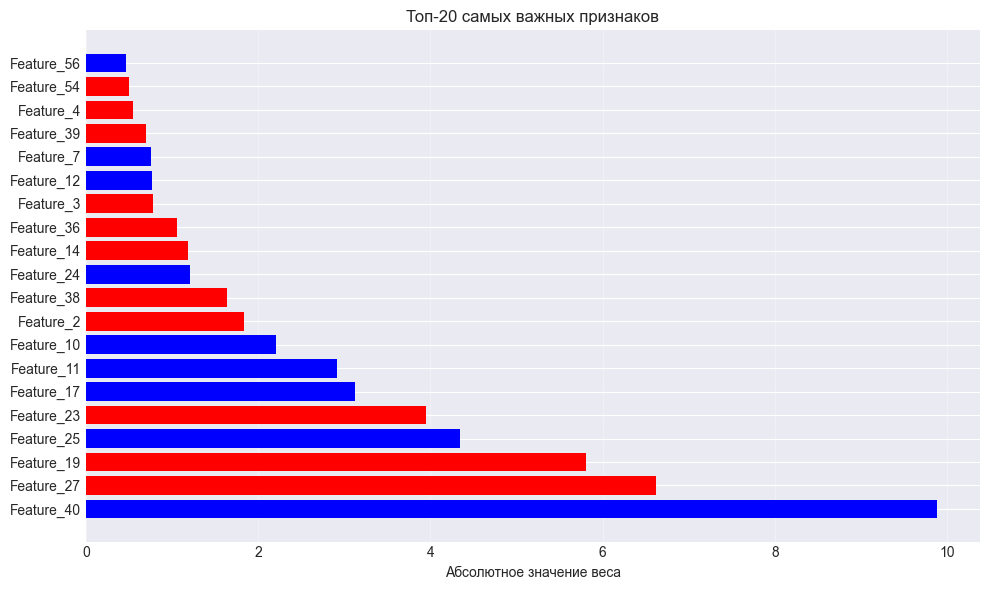

In [47]:
print("\n" + "=" * 80)
print("ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛИ")
print("=" * 80)

print("\n--- Обучение финальной модели ---")

final_model = LinearRegressionModel(
    method='analytical',
    regularization='l2',
    lambda_reg=0.01
)

final_model.fit(X_train_processed, y_train_processed, verbose=True)

y_train_pred = final_model.predict(X_train_processed)

train_metrics = RegressionMetrics.calculate_all(y_train_processed, y_train_pred, "Train_")
print("\nМетрики на обучающей выборке:")
for metric, value in train_metrics.items():
    display(f"  {metric.replace('Train_', '')}: {value:.4f}")

print("\n--- Кросс-валидация модели ---")
cv_scores, cv_mean, cv_std = CrossValidation.cross_val_score(
    final_model, X_train_processed, y_train_processed,
    cv=5, scoring='mse', verbose=True
)

print(f"\nРезультаты кросс-валидации:")
display(f"  Средний MSE: {cv_mean:.4f}")
display(f"  Стандартное отклонение: {cv_std:.4f}")


print("\n--- Сравнение с sklearn моделями ---")

models_to_compare = {
    'Наша модель': final_model,
    'Sklearn Linear': SklearnLinearRegression(),
    'Sklearn Ridge (alpha=0.01)': Ridge(alpha=0.01),
    'Sklearn Lasso (alpha=0.001)': Lasso(alpha=0.001, max_iter=5000)
}

comparison_results = []
for name, model in models_to_compare.items():
    if name != 'Наша модель':
        model.fit(X_train_processed, y_train_processed)

    y_pred = model.predict(X_train_processed)

    metrics = {
        'Модель': name,
        'MSE': RegressionMetrics.mse(y_train_processed, y_pred),
        'MAE': RegressionMetrics.mae(y_train_processed, y_pred),
        'R²': RegressionMetrics.r2(y_train_processed, y_pred)
    }
    comparison_results.append(metrics)

comparison_df = pd.DataFrame(comparison_results)
print("\nСравнение моделей на обучающих данных:")
print(comparison_df.to_string(index=False))

print("\n--- Анализ важности признаков ---")
weights, bias = final_model.get_coefficients()

feature_importance = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(len(weights))],
    'Weight': weights,
    'Abs_Weight': np.abs(weights)
}).sort_values('Abs_Weight', ascending=False)

print("\nТоп-10 самых важных признаков:")
display(feature_importance.head(10).to_string(index=False))

plt.figure(figsize=(10, 6))
top_n = 20
top_features = feature_importance.head(top_n)

colors = ['red' if w < 0 else 'blue' for w in top_features['Weight']]
plt.barh(range(top_n), top_features['Abs_Weight'], color=colors)
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Абсолютное значение веса')
plt.title(f'Топ-{top_n} самых важных признаков')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

__12. Улучшенное обучение и оптимизация__

In [48]:
print("\n" + "=" * 80)
print("УЛУЧШЕННОЕ ОБУЧЕНИЕ И ОПТИМИЗАЦИЯ МОДЕЛИ")
print("=" * 80)

class EnhancedLinearRegression:

    def __init__(self, method='analytical', learning_rate=0.01, n_iterations=2000,
                 regularization='l2', lambda_reg=0.1, alpha=0.5,
                 tol=1e-4, random_state=42):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.alpha = alpha
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.loss_history = []
        np.random.seed(random_state)

    def _compute_regularization_gradient(self, weights):
        if self.regularization == 'l1':
            return self.lambda_reg * np.sign(weights)
        elif self.regularization == 'l2':
            return 2 * self.lambda_reg * weights
        elif self.regularization == 'elastic':
            l1_grad = self.alpha * self.lambda_reg * np.sign(weights)
            l2_grad = 2 * (1 - self.alpha) * self.lambda_reg * weights
            return l1_grad + l2_grad
        else:
            return 0

    def fit(self, X, y, verbose=False):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).flatten()

        n_samples, n_features = X.shape
        if self.regularization == 'l1' or self.regularization == 'elastic':
            self.weights = np.zeros(n_features)
        else:

            limit = np.sqrt(2 / n_features)
            self.weights = np.random.uniform(-limit, limit, n_features)

        self.bias = np.mean(y) if n_samples > 0 else 0

        if self.method == 'analytical':
            X_b = np.c_[np.ones((n_samples, 1)), X]

            if self.regularization == 'l2':
                I = np.eye(X_b.shape[1])
                I[0, 0] = 0
                self.theta = np.linalg.pinv(X_b.T @ X_b + self.lambda_reg * I) @ X_b.T @ y
            elif self.regularization == 'elastic':

                I = np.eye(X_b.shape[1])
                I[0, 0] = 0
                ridge_part = (1 - self.alpha) * self.lambda_reg * I

                self.theta = np.linalg.pinv(X_b.T @ X_b + ridge_part) @ X_b.T @ y
                threshold = self.alpha * self.lambda_reg
                self.theta = np.sign(self.theta) * np.maximum(np.abs(self.theta) - threshold, 0)
            else:
                self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

            self.bias = self.theta[0]
            self.weights = self.theta[1:]

        elif self.method == 'gradient_descent':
            prev_loss = float('inf')

            for i in range(self.n_iterations):
                y_pred = X @ self.weights + self.bias

                error = y_pred - y
                dw = (X.T @ error) / n_samples
                db = np.mean(error)

                dw_reg = self._compute_regularization_gradient(self.weights)
                dw += dw_reg

                current_lr = self.learning_rate / (1 + 0.01 * i)

                self.weights -= current_lr * dw
                self.bias -= current_lr * db

                loss = np.mean(error ** 2)
                if self.regularization == 'l1':
                    reg_loss = self.lambda_reg * np.sum(np.abs(self.weights))
                elif self.regularization == 'l2':
                    reg_loss = self.lambda_reg * np.sum(self.weights ** 2)
                elif self.regularization == 'elastic':
                    l1_loss = self.alpha * self.lambda_reg * np.sum(np.abs(self.weights))
                    l2_loss = (1 - self.alpha) * self.lambda_reg * np.sum(self.weights ** 2)
                    reg_loss = l1_loss + l2_loss
                else:
                    reg_loss = 0

                total_loss = loss + reg_loss
                self.loss_history.append(total_loss)
                if i > 10 and abs(prev_loss - total_loss) < self.tol:
                    if verbose:
                        print(f"Сходимость достигнута на итерации {i}")
                    break

                prev_loss = total_loss

                if verbose and i % 500 == 0:
                    print(f"Итерация {i}, Loss: {total_loss:.4f}")

        return self

    def predict(self, X):
        if self.weights is None or self.bias is None:
            raise ValueError("Модель не обучена")
        return X @ self.weights + self.bias




УЛУЧШЕННОЕ ОБУЧЕНИЕ И ОПТИМИЗАЦИЯ МОДЕЛИ


__13. Отбор признаков и улучшение данных__

In [49]:
print("\n--- Отбор и улучшение признаков ---")

def select_best_features(X, y, method='correlation', n_features=50):
    if method == 'correlation':
        correlations = []
        for i in range(X.shape[1]):
            corr = np.corrcoef(X[:, i], y)[0, 1]
            if not np.isnan(corr):
                correlations.append(abs(corr))
            else:
                correlations.append(0)

        correlations = np.array(correlations)
        top_indices = np.argsort(correlations)[-n_features:][::-1]

    elif method == 'variance':
        variances = np.var(X, axis=0)
        top_indices = np.argsort(variances)[-n_features:][::-1]

    elif method == 'mutual_info':
        from sklearn.feature_selection import mutual_info_regression
        mi = mutual_info_regression(X, y, random_state=42)
        top_indices = np.argsort(mi)[-n_features:][::-1]

    return top_indices

def create_polynomial_features(X, degree=2):
    n_samples, n_features = X.shape
    poly_features = []

    if degree >= 2:
        squares = X ** 2
        poly_features.append(squares)

    if degree >= 2 and n_features < 50:
        for i in range(n_features):
            for j in range(i+1, n_features):
                interaction = X[:, i] * X[:, j]
                poly_features.append(interaction.reshape(-1, 1))

    if poly_features:
        X_poly = np.hstack([X] + poly_features)
        return X_poly
    return X

print("Создание полиномиальных признаков...")
X_train_poly = create_polynomial_features(X_train_processed, degree=2)
print(f"После создания полиномиальных признаков: {X_train_poly.shape}")

print("\nОтбор лучших признаков...")
best_features_idx = select_best_features(X_train_poly, y_train_processed,
                                        method='correlation', n_features=60)
X_train_selected = X_train_poly[:, best_features_idx]

X_test_poly = create_polynomial_features(X_test_processed, degree=2)
X_test_selected = X_test_poly[:, best_features_idx]

print(f"После отбора признаков: {X_train_selected.shape}")



--- Отбор и улучшение признаков ---
Создание полиномиальных признаков...
После создания полиномиальных признаков: (9788, 124)

Отбор лучших признаков...
После отбора признаков: (9788, 60)


__14. Подбор гиперпараметров и обучение__

In [50]:
print("\n--- Подбор гиперпараметров ---")

configurations = [
    {'method': 'analytical', 'regularization': 'l2', 'lambda_reg': 0.01},
    {'method': 'analytical', 'regularization': 'l2', 'lambda_reg': 0.1},
    {'method': 'analytical', 'regularization': 'l2', 'lambda_reg': 1.0},
    {'method': 'analytical', 'regularization': 'elastic', 'lambda_reg': 0.1, 'alpha': 0.5},
    {'method': 'gradient_descent', 'regularization': 'l2', 'lambda_reg': 0.1, 'learning_rate': 0.01},
]

best_model = None
best_mse = float('inf')
best_config = None

for config in configurations:
    print(f"\nТестируем конфигурацию: {config}")

    model = EnhancedLinearRegression(**config)
    model.fit(X_train_selected, y_train_processed)

    y_pred = model.predict(X_train_selected)
    mse = RegressionMetrics.mse(y_train_processed, y_pred)

    print(f"MSE: {mse:.4f}, R²: {RegressionMetrics.r2(y_train_processed, y_pred):.4f}")

    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_config = config

print(f"\nЛучшая конфигурация: {best_config}")
print(f"Лучший MSE: {best_mse:.4f}")




--- Подбор гиперпараметров ---

Тестируем конфигурацию: {'method': 'analytical', 'regularization': 'l2', 'lambda_reg': 0.01}
MSE: 30.8543, R²: 0.8961

Тестируем конфигурацию: {'method': 'analytical', 'regularization': 'l2', 'lambda_reg': 0.1}
MSE: 30.8544, R²: 0.8961

Тестируем конфигурацию: {'method': 'analytical', 'regularization': 'l2', 'lambda_reg': 1.0}
MSE: 30.8626, R²: 0.8961

Тестируем конфигурацию: {'method': 'analytical', 'regularization': 'elastic', 'lambda_reg': 0.1, 'alpha': 0.5}
MSE: 31.7672, R²: 0.8930

Тестируем конфигурацию: {'method': 'gradient_descent', 'regularization': 'l2', 'lambda_reg': 0.1, 'learning_rate': 0.01}
MSE: 23060.7226, R²: -76.6537

Лучшая конфигурация: {'method': 'analytical', 'regularization': 'l2', 'lambda_reg': 0.01}
Лучший MSE: 30.8543


__15. Создание submission.csv__

In [53]:
pd.DataFrame({'RiskScore': y_test_pred}).to_csv('submission.csv', index_label='ID')